## DOWNSTREAM SIGNALING DYNAMICS

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from msresist.pca import plotPCA
from scipy.stats import zscore

In [2]:
# Set plotting format
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

## Import and Preprocess Data

In [3]:
def preprocess(ts, utIDX, type="median"):
    ts.iloc[:, 3:] = np.log(ts.iloc[:, 3:])
    for ii in utIDX:
        if type == "median":
            d = ts.iloc[ii:ii+13, 3:]
            ts.iloc[ii:ii+13, 3:] = zscore(d)
        elif type == "UT":
            ts.iloc[ii:ii+13, 3:] /= ts.iloc[ii, 3:]
    return ts

In [4]:
# BR1
ts1 = pd.read_csv("msresist/data/Validations/Luminex/AXLm_TimeSeries_Signaling_BR1.csv")
utIDX = [i for i in range(0, 130, 13)]
ts1_fc = preprocess(ts1.copy(), utIDX, type="UT")
ts1_fc["BR"] = 1
ts1_med = preprocess(ts1, utIDX, type="median")
ts1_med["BR"] = 1

# Variables
cell_lines = list(ts1[(ts1["Treatment"] == "UT")]["Cell Line"])
tps = sorted(list(set(ts1["Time point"])))
prots = list(ts1.columns[3:])

# BR2
ts2 = pd.read_csv("msresist/data/Validations/Luminex/AXLm_TimeSeries_Signaling_BR2.csv")
ts2_fc = preprocess(ts2.copy(), utIDX, type="UT")
ts2_fc["BR"] = 2
ts2_med = preprocess(ts2, utIDX, type="median")
ts2_med["BR"] = 2


# # BR3
# ts3 = pd.read_csv("msresist/data/Validations/Luminex/AXLm_TimeSeries_Signaling_TR3.csv")
# ts3.insert(0, "Cell Line", [s.split(".")[0] for s in ts3["Sample"]])
# ts3.insert(1, "Treatment", [s.split(".")[-1] for s in ts3["Sample"]])
# ts3.insert(2, "Time point", [s.split(".")[1] for s in ts3["Sample"]])
# ts3 = ts3.drop("Sample", axis=1)
# display(ts2.head())
# display(ts3.head())
# ts3_fc = preprocess(ts3, utIDX, type="UT")
# ts3_fc["BR"] = 3

# Merge
ts_fc = pd.concat([ts1_fc, ts2_fc], axis=0)
ts_med = pd.concat([ts1_med, ts2_med], axis=0)



In [5]:
def plt_psite_dynamics_across_CellLines(x2, ax, cell_lines):
    for ii, cl in enumerate(cell_lines):
        x3 = x2[(x2["Cell Line"] == cl) & (x2["Proteins"] == "p-AXL")]
        x3 = x3[x3["Treatment"] != "UT"]
        sns.lineplot(data=x3, x="Time point", y="log(p-signal) FC to 0h", hue="Treatment", errorbar=('ci', 63), ax=ax[ii], marker="o").set_title(cl)
        if ii != 0:
            ax[ii].get_legend().remove()
        ax[ii].set(xticks=[0, 30, 60, 120, 240])
        ax[ii].set_ylabel("log(p-AXL signal) FC to t=0min")
        ax[ii].set_xlabel("Minutes")
        plt.tight_layout()

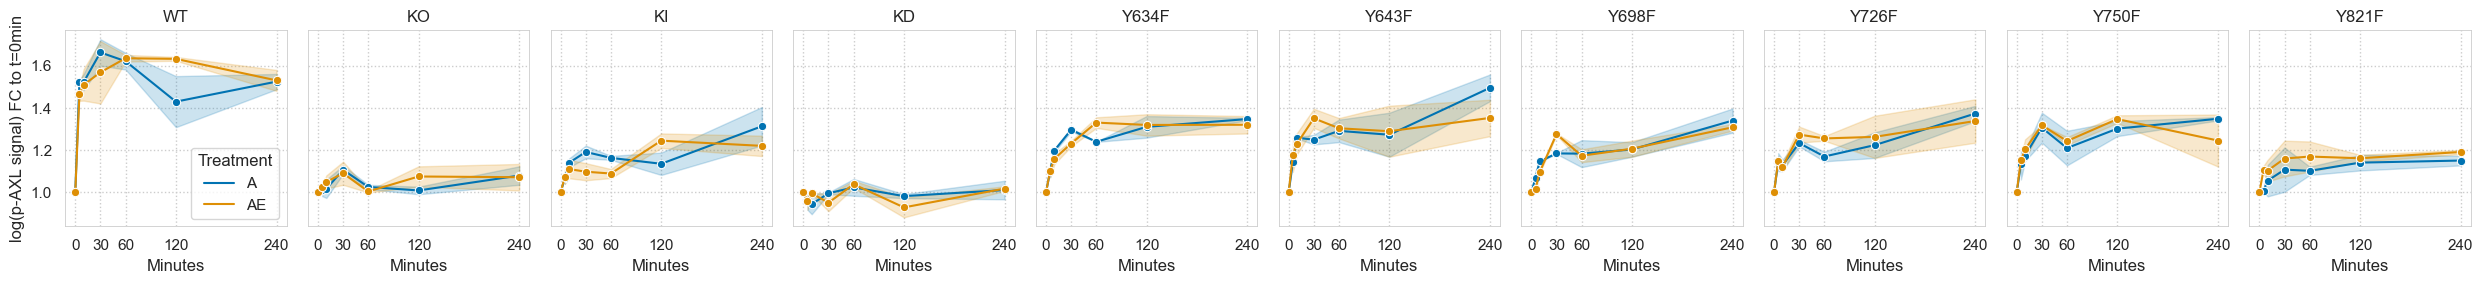

In [6]:
d_long = pd.melt(ts_fc, id_vars=["Cell Line", "Treatment", "Time point"], value_vars=ts_fc.columns[3:-1], value_name="log(p-signal) FC to 0h", var_name="Proteins")
t0s = []
for cl in cell_lines:
    for t in ["A", "AE"]:
        for p in list(set(d_long["Proteins"])):
            t0s.append(pd.Series([cl, t, 0, p, 1.0], index=d_long.columns))

d_long = pd.concat([d_long, pd.concat(t0s, axis=1).T], axis=0)
d_long.index = np.arange(d_long.shape[0])
d_long = d_long[d_long["Treatment"] != "UT"]

_, ax = plt.subplots(1, len(cell_lines), sharey=True, figsize=(25, 3))
plt_psite_dynamics_across_CellLines(d_long, ax, cell_lines)
# plt.savefig("pAXL_time.svg")

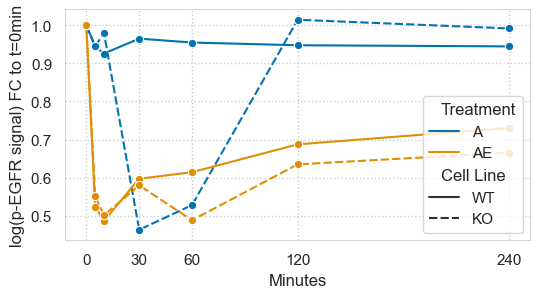

In [23]:
_, ax = plt.subplots(1, 1, figsize=(6, 3))
wtko = d_long.set_index("Cell Line").loc[["WT", "KO"]].reset_index()
sns.lineplot(data=wtko[wtko["Proteins"] == "p-EGFR"], x="Time point", y="log(p-signal) FC to 0h", hue="Treatment", style="Cell Line", errorbar=('ci', 63), ax=ax, marker="o")
ax.set_ylabel("log(p-EGFR signal) FC to t=0min")
ax.set_xlabel("Minutes")
ax.set(xticks=[0, 30, 60, 120, 240])
plt.savefig("EGFR.svg")

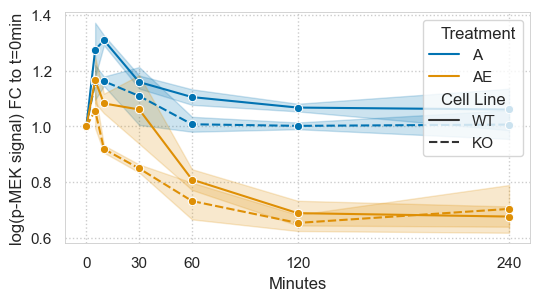

In [15]:
_, ax = plt.subplots(1, 1, figsize=(6, 3))
wtko = d_long.set_index("Cell Line").loc[["WT", "KO"]].reset_index()
sns.lineplot(data=wtko[wtko["Proteins"] == "p-MEK"], x="Time point", y="log(p-signal) FC to 0h", hue="Treatment", style="Cell Line", errorbar=('ci', 63), ax=ax, marker="o")
ax.set_ylabel("log(p-MEK signal) FC to t=0min")
ax.set_xlabel("Minutes")
ax.set(xticks=[0, 30, 60, 120, 240])
plt.savefig("MEK.svg")

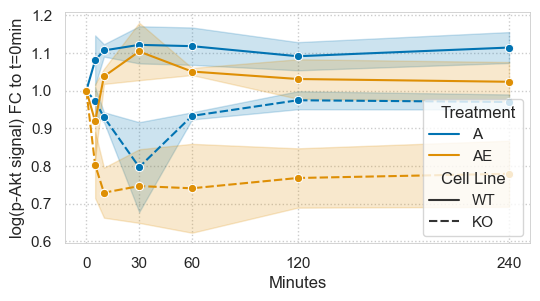

In [21]:
_, ax = plt.subplots(1, 1, figsize=(6, 3))
wtko = d_long.set_index("Cell Line").loc[["WT", "KO"]].reset_index()
sns.lineplot(data=wtko[wtko["Proteins"] == "Akt"], x="Time point", y="log(p-signal) FC to 0h", hue="Treatment", style="Cell Line", errorbar=('ci', 63), ax=ax, marker="o")
ax.set_ylabel("log(p-Akt signal) FC to t=0min")
ax.set_xlabel("Minutes")
ax.set(xticks=[0, 30, 60, 120, 240])
plt.savefig("Akt.svg")

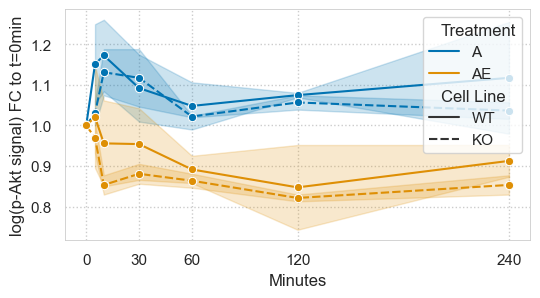

In [20]:
_, ax = plt.subplots(1, 1, figsize=(6, 3))
wtko = d_long.set_index("Cell Line").loc[["WT", "KO"]].reset_index()
sns.lineplot(data=wtko[wtko["Proteins"] == "p-Erk"], x="Time point", y="log(p-signal) FC to 0h", hue="Treatment", style="Cell Line", errorbar=('ci', 63), ax=ax, marker="o")
ax.set_ylabel("log(p-Akt signal) FC to t=0min")
ax.set_xlabel("Minutes")
ax.set(xticks=[0, 30, 60, 120, 240])
plt.savefig("Akt.svg")